In [1]:
%load_ext autoreload
%autoreload 2

Ground truth labels provided. Computing ground truth-based clustering metrics algon with non-ground truth based metrics.
[k=2] Best run is 0 (out of 10) with Calinski-Harabasz score = 513.925
[k=3] Best run is 0 (out of 10) with Calinski-Harabasz score = 561.628
[k=4] Best run is 0 (out of 10) with Calinski-Harabasz score = 530.766
[k=5] Best run is 1 (out of 10) with Calinski-Harabasz score = 495.541
[k=6] Best run is 0 (out of 10) with Calinski-Harabasz score = 473.851
[k=7] Best run is 8 (out of 10) with Calinski-Harabasz score = 449.641
[k=8] Best run is 1 (out of 10) with Calinski-Harabasz score = 440.598
[k=9] Best run is 8 (out of 10) with Calinski-Harabasz score = 413.425
[k=10] Best run is 6 (out of 10) with Calinski-Harabasz score = 394.592
Saving non-ground truth-based clustering metrics plot at /home/rgura001/clustutils4r/src/clustutils4r/results/feats_clustering_metrics.png


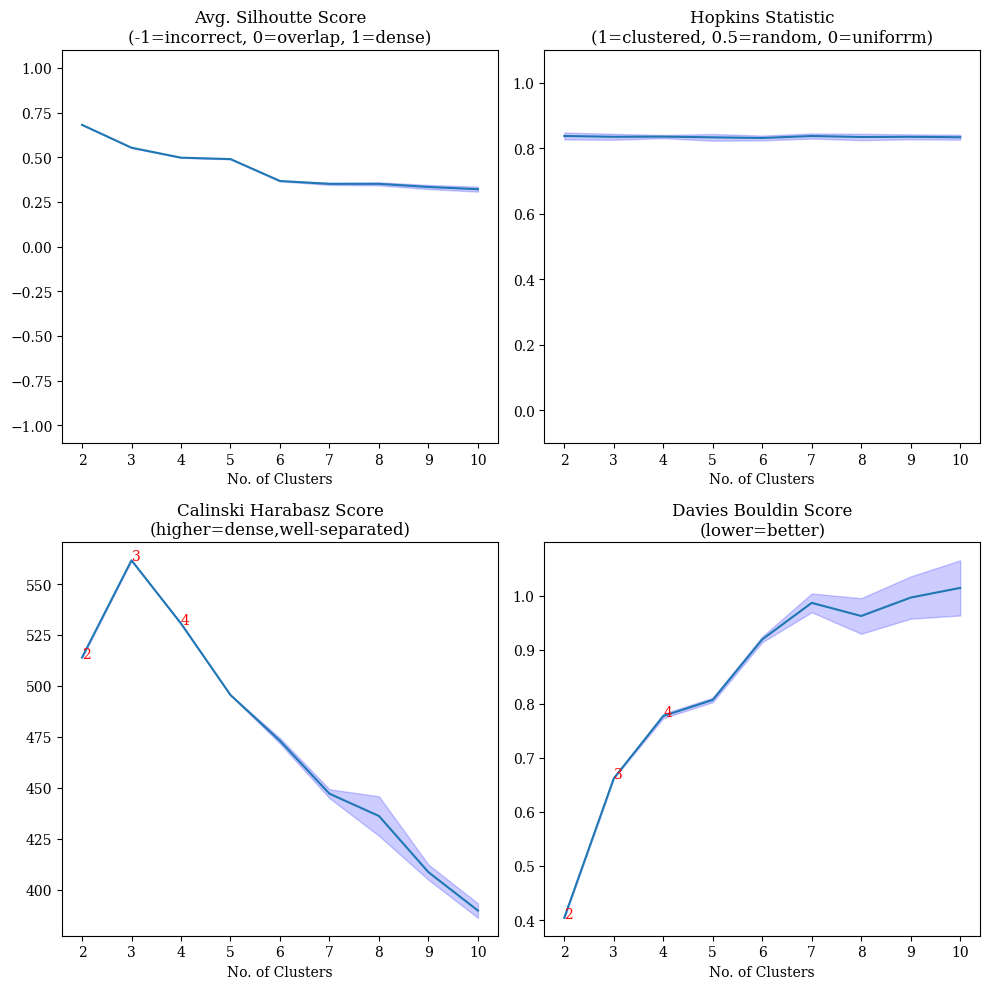

Saving ground truth-based clustering metrics plot at /home/rgura001/clustutils4r/src/clustutils4r/results/feats_clustering_metrics.png


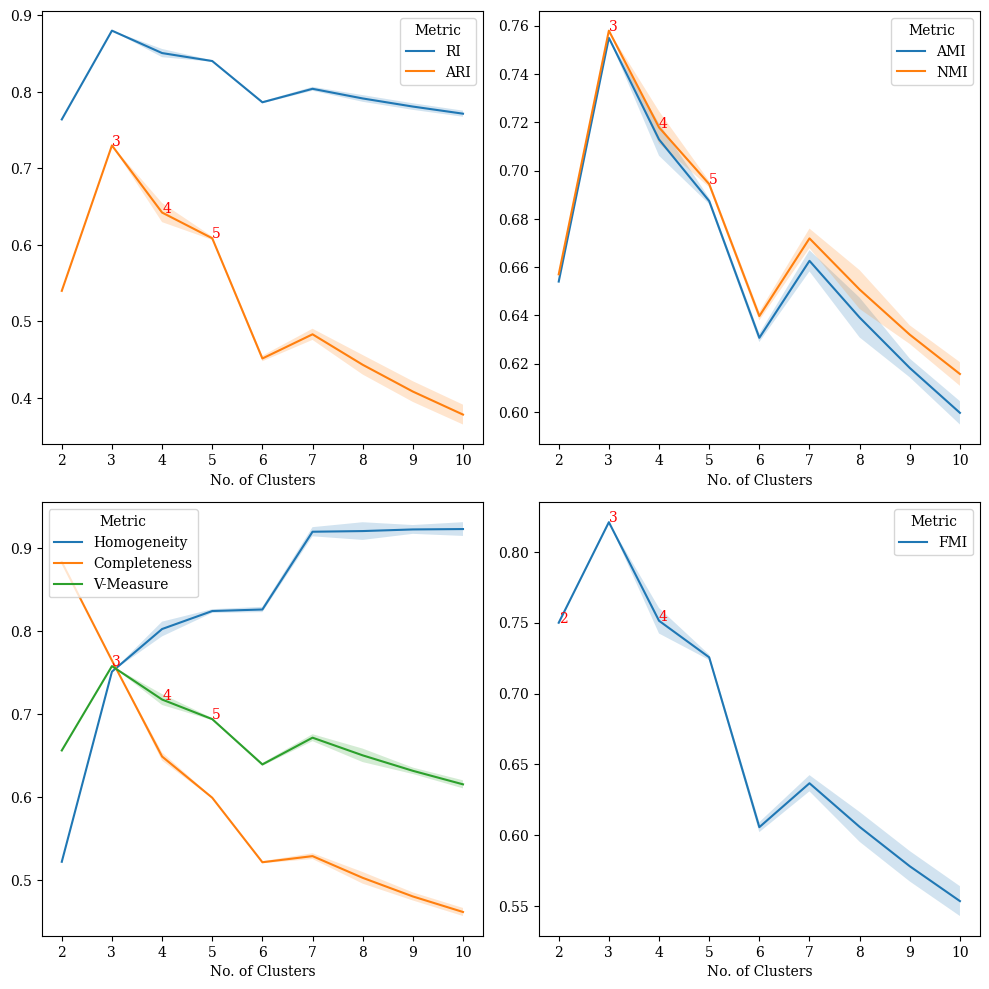

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import os, collections
from sklearn import datasets
from sklearn.cluster import KMeans

from eval_clustering import eval_clustering

# Load the iris dataset
iris = datasets.load_iris()

# Split the data into features and labels
X = iris.data
y = iris.target

# Run the evaluation
range_clusters = list(range(2,10+1))
labelled_datapoints, \
   nongt_metrics, \
      gt_metrics = eval_clustering(X=X, gt_labels=y,
                                    model=KMeans(),
                                    num_clusters=range_clusters, num_runs=10,
                                    annotate_topN_best_scores=True, annotN=3,
                                    make_metrics_plots=True,
                                    make_silhoutte_plots=False,
                                    show=True, 
                                    save=True, RESULTS_DIR=os.getcwd()+'/results',
                                )

Ground truth labels provided. Computing ground truth-based clustering metrics algon with non-ground truth based metrics.
[k=3] Best run is 0 (out of 10) with Calinski-Harabasz score = 561.628
Embedding data in 2-D...


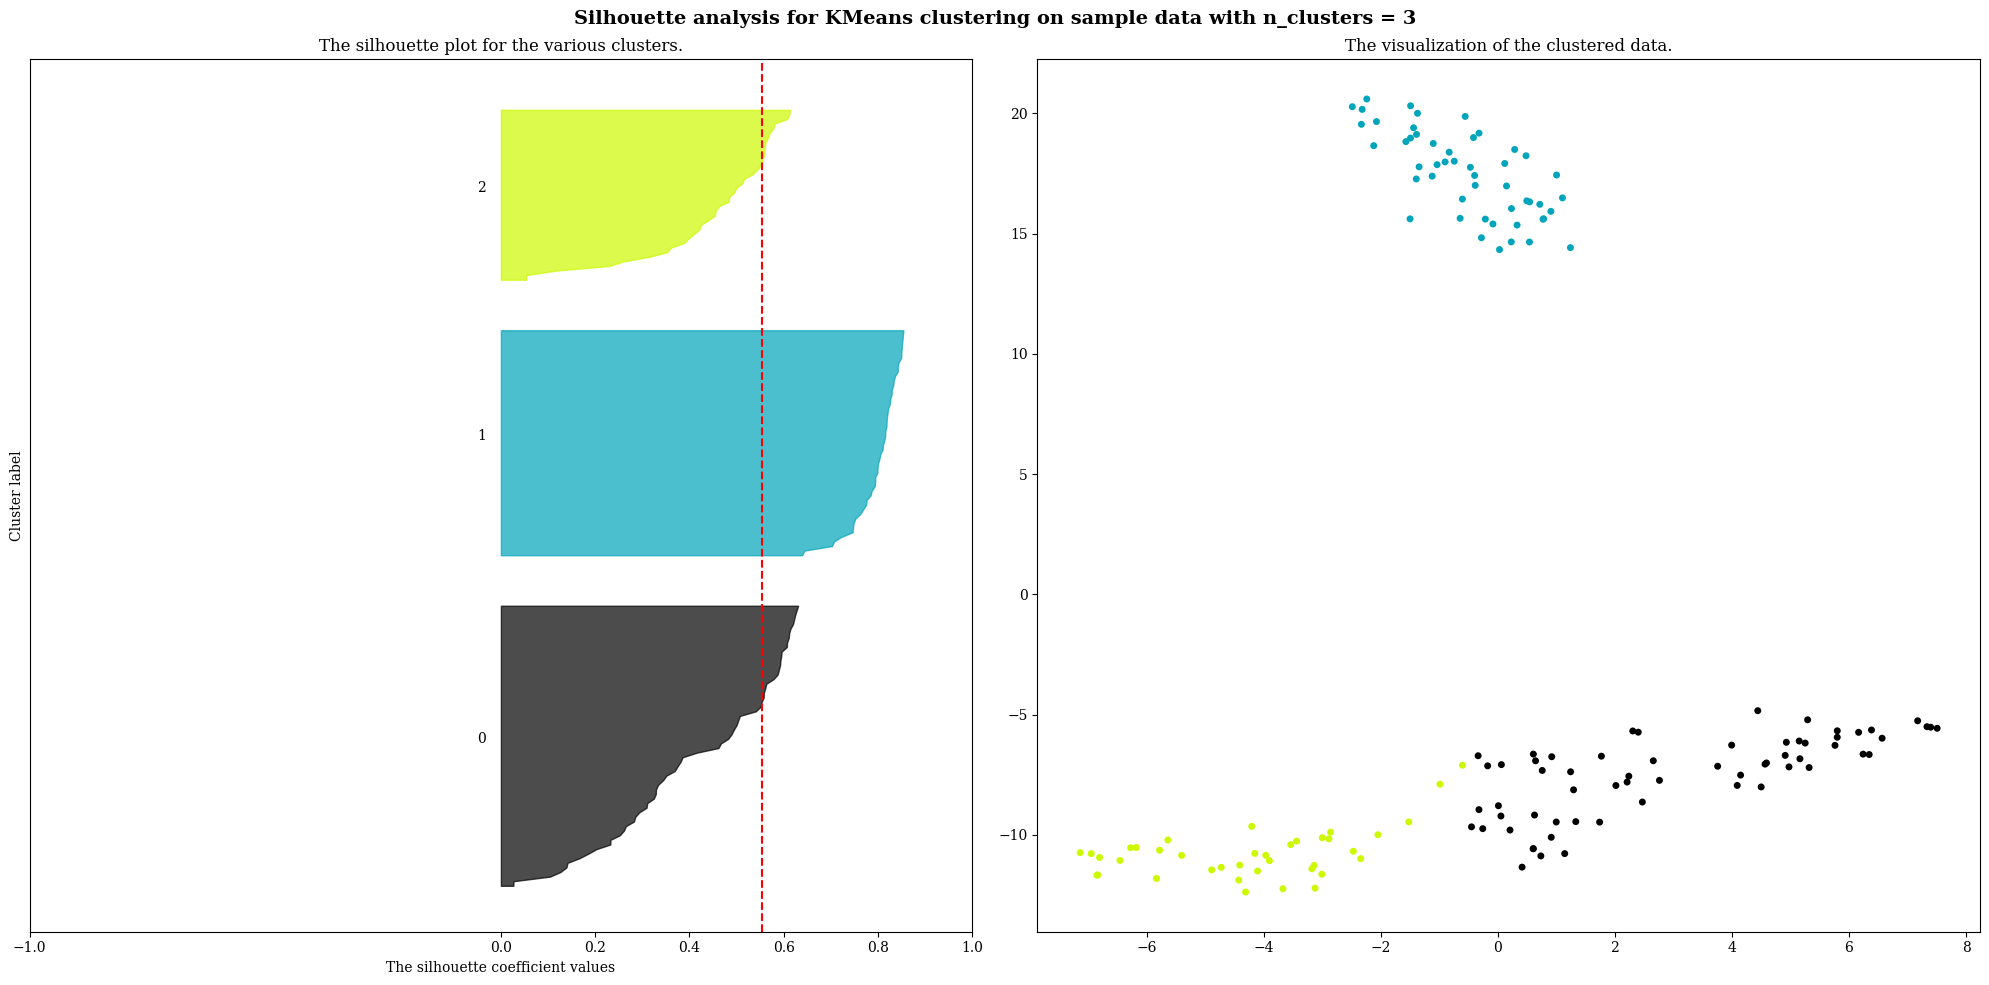

[k=6] Best run is 0 (out of 10) with Calinski-Harabasz score = 473.851
Embedding data in 2-D...


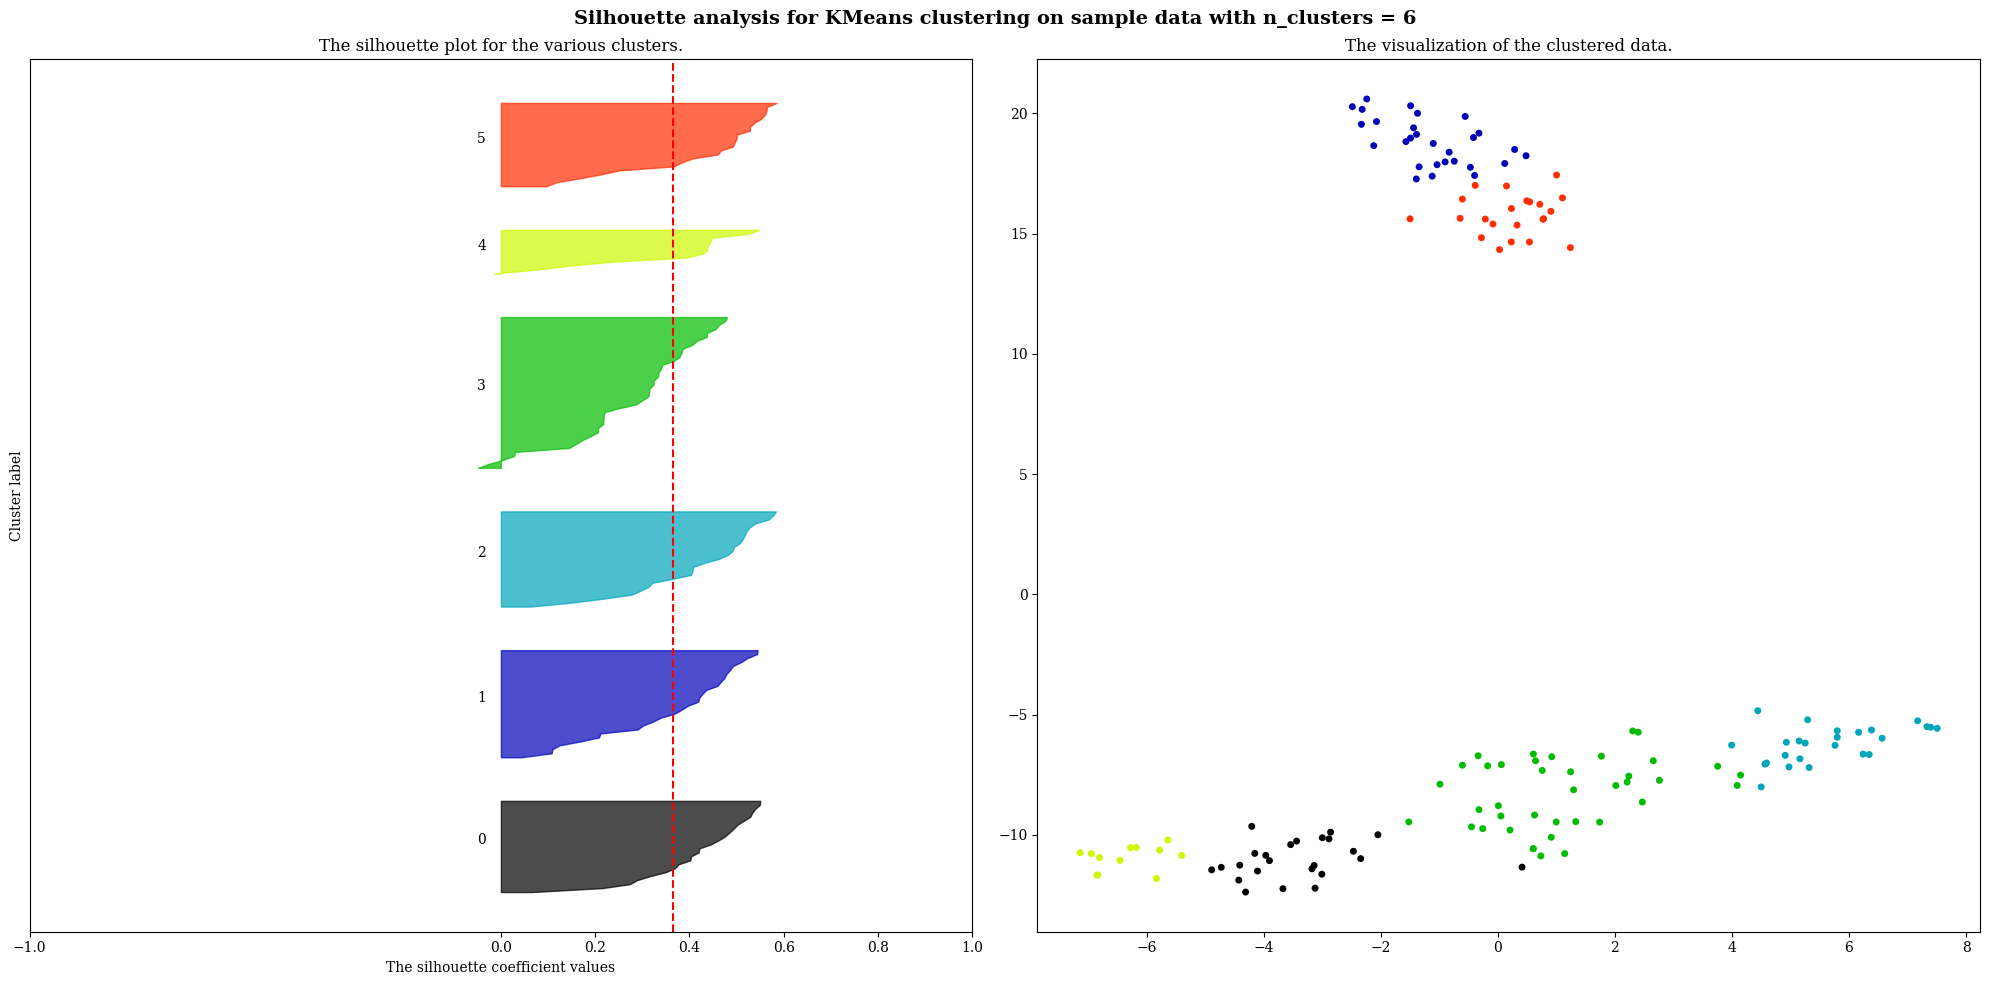

In [5]:
range_clusters = [3,6]
labelled_segs, \
   nongt_metrics, \
      gt_metrics = eval_clustering(X=X, gt_labels=y,
                                             model=KMeans(),
                                             num_clusters=range_clusters, 
                                             make_metrics_plots=False,
                                             make_silhoutte_plots=True, embed_data_in_2d=True,
                                             show=True, 
                                             save=False, RESULTS_DIR=os.getcwd()+'/results',
                                          )